Train Data analysis of VinbigData Chest X-Rays

In [3]:
import pandas as pd
training_data_info = pd.read_csv('/Users/anyhow/projects/data_science/Medical-Report-Generation/remote-dataset/vinbigdata-chest-xray-abnormalities-detection/train.csv')
training_data_info.head()

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN


In [5]:
print(training_data_info.info())
labels = training_data_info['class_name'].unique()
print(labels)
image_id = training_data_info['image_id'].unique()
print(len(image_id))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67914 entries, 0 to 67913
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image_id    67914 non-null  object 
 1   class_name  67914 non-null  object 
 2   class_id    67914 non-null  int64  
 3   rad_id      67914 non-null  object 
 4   x_min       36096 non-null  float64
 5   y_min       36096 non-null  float64
 6   x_max       36096 non-null  float64
 7   y_max       36096 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 4.1+ MB
None
['No finding' 'Cardiomegaly' 'Aortic enlargement' 'Pleural thickening'
 'ILD' 'Nodule/Mass' 'Pulmonary fibrosis' 'Lung Opacity' 'Atelectasis'
 'Other lesion' 'Infiltration' 'Pleural effusion' 'Calcification'
 'Consolidation' 'Pneumothorax']
15000


In [10]:
import plotly.express as px

# Count frequency of each class
class_distribution = training_data_info['class_name'].value_counts().reset_index()
class_distribution.columns = ['Class', 'Count']

# Create pie chart
fig = px.pie(class_distribution, 
             values='Count',
             names='Class',
             title='Distribution of Classes in RSNA Dataset',
             color='Class')

# Update layout for better readability
fig.update_layout(
    width=800,
    height=500
)

fig.show()



Image Analysis of The Vinbig dataset

Study ID: 50a418190bc3fb1ef1633bf9678929b3
Image Dimensions: 2332x2580


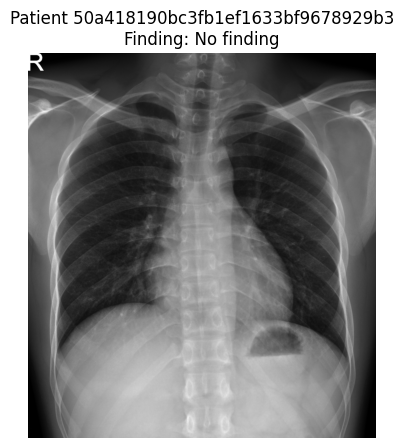

Study ID: 9a5094b2563a1ef3ff50dc5c7ff71345
Image Dimensions: 2080x2336


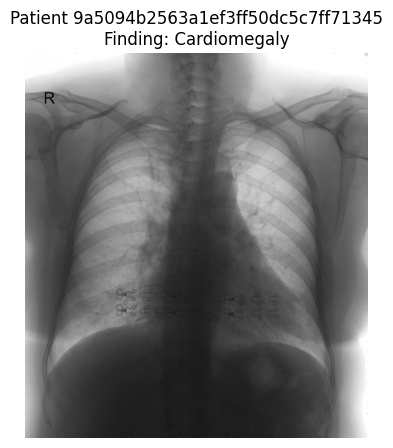

Study ID: 051132a778e61a86eb147c7c6f564dfe
Image Dimensions: 2304x2880


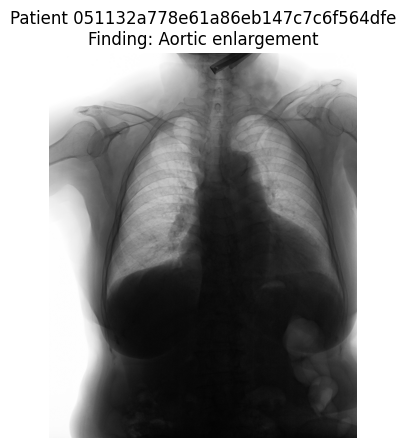

Study ID: 1c32170b4af4ce1a3030eb8167753b06
Image Dimensions: 2540x3072


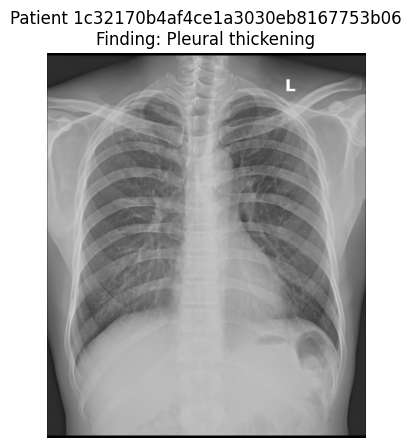

Study ID: 0c7a38f293d5f5e4846aa4ca6db4daf1
Image Dimensions: 2285x2555


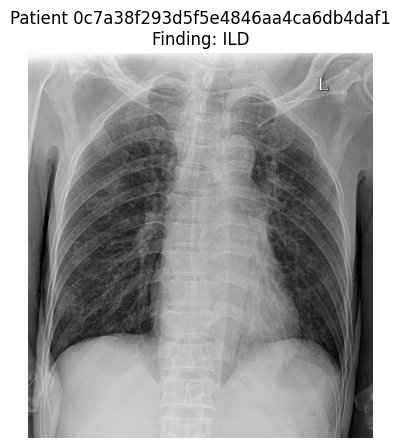

Study ID: 47ed17dcb2cbeec15182ed335a8b5a9e
Image Dimensions: 2568x3353


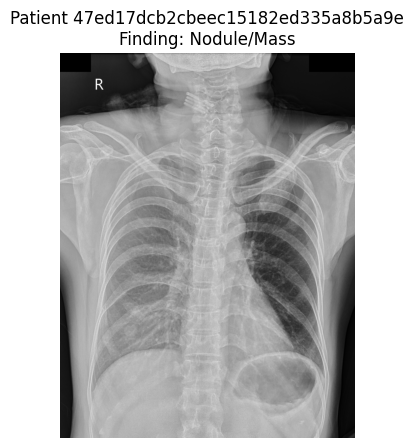

Study ID: afb6230703512afc370f236e8fe98806
Image Dimensions: 2540x3072


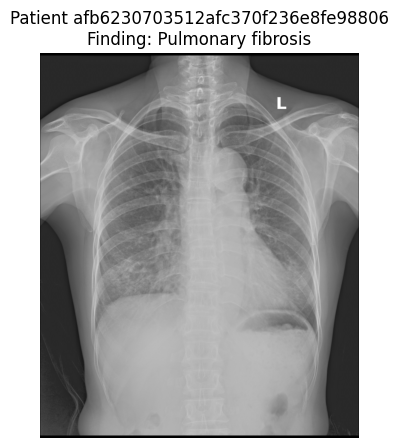

Study ID: 7c1add6833d5f0102b0d3619a1682a64
Image Dimensions: 2944x3014


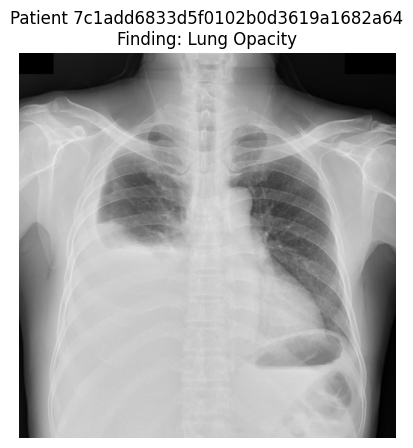

Study ID: 80caa435b6ab5edaff4a0a758ffaec6e
Image Dimensions: 3001x3107


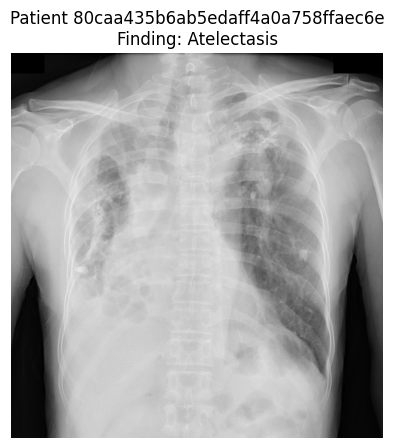

Study ID: c394eadea89e5795c8037280492d116d
Image Dimensions: 2304x2880


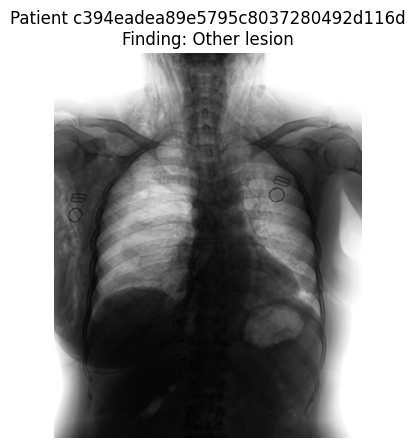

Study ID: d7aea6f37597df566725da73655edcc2
Image Dimensions: 2594x3395


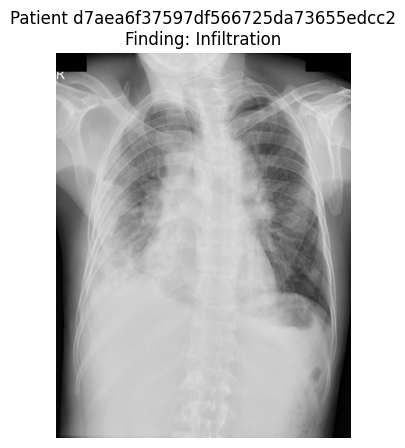

Study ID: 04bb8bd7ee6f88a16623fe5c6dd4da91
Image Dimensions: 3320x2623


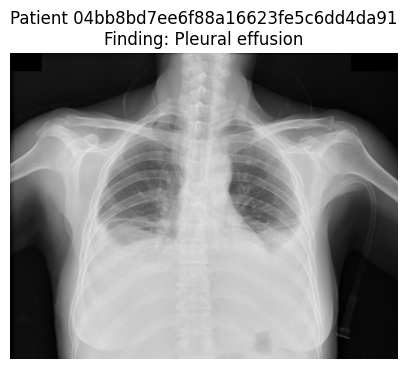

Study ID: 2e285b95faad220e17e6cbfbe514733e
Image Dimensions: 2048x2500


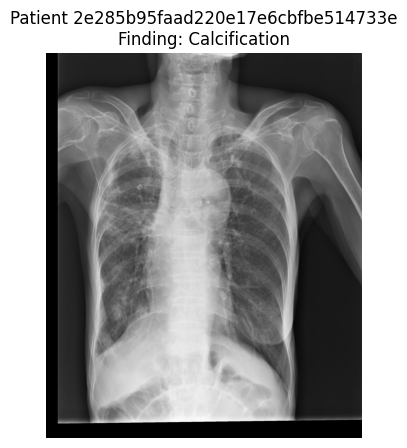

Study ID: bd3fe876153eeddad8bab49b129ea081
Image Dimensions: 2304x2880


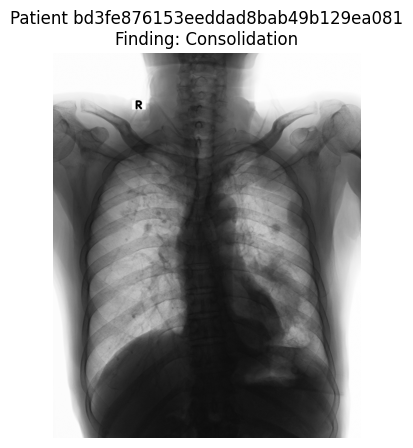

Study ID: 6e4391555899c8474c4d32f42b2ba21b
Image Dimensions: 2787x2912


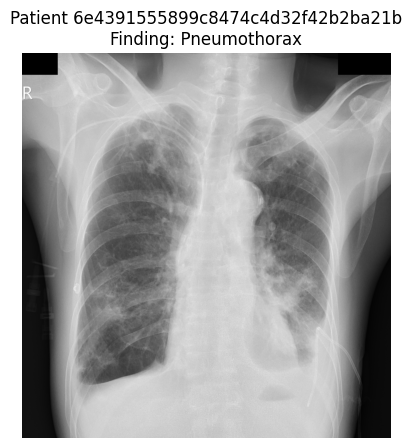

In [12]:
import pydicom
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def load_and_display_dicom(patientId, specific_finding):
    # Load DICOM file
    image_path = f"/Users/achu/Documents/Projects/Data-Science/Medical Report Generation/remote-dataset/vinbigdata-chest-xray-abnormalities-detection/train/{patientId}.dicom"
    dicom = pydicom.dcmread(image_path)
    
    # Convert to array and normalize
    array = dicom.pixel_array
    array = ((array - array.min()) * (255.0 / (array.max() - array.min()))).astype(np.uint8)
    
    # Print dimensions
    print(f"Image Dimensions: {array.shape[1]}x{array.shape[0]}")
    
    # Display
    plt.figure(figsize=(5,5))
    plt.imshow(array, cmap='gray')  # Use grayscale colormap for X-rays
    plt.title(f"Patient {patientId}\nFinding: {specific_finding}")
    plt.axis("off")
    plt.show()

# For each class
for specific_finding in labels:
    # Find patientId
    patient_info = training_data_info[training_data_info['class_name'] == specific_finding]
    patientId = patient_info['image_id'].values[0]
    print(f"Study ID: {patientId}")
    
    # Load and display
    load_and_display_dicom(patientId, specific_finding)